In [2]:
import scipy as sp
from scipy import stats, optimize, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

# 36절: 검정과 유의확률

# 검정과 모수 추정의 의미

데이터 분석의 첫번째 가정
> 분석하고자 하는 데이터가 어떤 확률 변수(random variable)로부터 실현(realized)된 표본(sample)이다.

데이터는 이 확률 변수를 알아내기 위한 일련의 참고 자료일 뿐이다. <br>
확률 변수는 분포 모형(distribution model)과 모수(parameter)를 가진다.


* 검정(test) 또는 모수 추정(parameterestimation)

    1. 해당 데이터가 특정한 분포 모형, 예를 들면 가우시안 정규 분포로부터 생성된 것인가?
        
        첫번째 질문은 확률 변수의 분포에 대한 가설(hypothesis)
        맞는지 틀리는지를 확인하는 확률 변수의 분포 검정(distribution test)
        확률 변수의 분포가 정규 분포를 띄는지 확인 정규성 검정(normality test)
    
    
    2. 만약 그렇다면 그 정규 분포의 기댓값 모수 μ 와 분산 σ2 이 특정한 값을 가지고 있는가? 예를 들면 μ=0  인가 아닌가?
    
        확률 밀도 함수(pdf)의 계수(coefficient) 즉, 모수(parameter)가 특정한 값을 가지는지 
        혹은 특정한 값과 비교하여 큰지 작은지를 확인하는 과정 모수 검정(parameter test)
    
    3. 정규 분포의 기댓값 모수 μ 가 0이 아니라면 구체적으로 어떤 값을 가질 것인가?

         모수가 실제로 어떤 숫자를 가질 확률이 가장 높은지를 알아내는 작업
         모수 추정(parameter estimation) 또는 추정(estimation)

         MSE(Maximum Squred Error) 방법, MLE(Maximum Likelihood Estimation) 방법 등은 
         가장 확률이 높은 숫자 하나를 결정하는 방법의 하나이며 
         베이지안 추정법(Bayesian Estimation)은 가능한 모든 값에 대해 
         이 값들이 진짜 모수가 될 확률을 모두 계산하여 분포로 표시하는 방법

# 검정과 유의 확률

검정(testing)은 데이터 뒤에 숨어있는 확률 변수의 분포와 모수에 대한 가설의 진위를 정량적(quantitatively)으로 증명하는 작업

 * 문제1
> 어떤 동전을 15번 던졌더니 12번이 앞면이 나왔다. 이 동전은 휘어지지 않은 공정한 동전(fair coin)인가?


1. 데이터가 어떤 고정된(fixed) 확률 분포를 가지는 확률 변수라고 가정한다. 동전은 베르누이 분포를 따르는 확률 변수의 표본이며 트레이더의 수익률은 정규 분포를 따르는 확률 변수의 표본이라고 가정한다.

2. 이 확률 분포의 모수값이 특정한 값을 가지는지 혹은 특정한 값보다 크거나 같은지 알고자 한다. 동전이 공정한 동전이라고 주정하는 것은 그 뒤의 베르누이 확률 분포의 모수 θ 의 값이 0.5 이라고 주장하는 것과 같다. 트레이더가 장기적으로 돈을 벌어다 줄 것이라고 주장하는 것은 그 뒤의 정규 분포의 기댓값 모수 μ  가 0보다 크거나 같다고 주장하는 것이다.

3. 모수 값이 이러한 주장을 따른다고 가정하면 실제로 현실에 나타난 데이터가 나올 확률을 계산할 수 있다. 동전의 경우에는 공정한 동전임에도 불구하고 15번 중 12번이나 앞면이 나올 확률을 계산할 수 있으며 트레이더의 경우에는 정규 분포에서 해당 데이터가 나올 확률을 계산할 수 있다.

4. 이렇게 구한 확률의 값이 판단자가 정한 특정한 기준에 미치지 못한다면 이러한 주장이 틀렸다고 생각할 수 밖에 없다. 반대로 값이 기준보다 높다면 그 주장이 틀렸다고 판단할 증거가 부족한 것이다.


## 가설

확률 분포에 대한 어떤 주장을 가설(hypothesis)

가설을 증명하는 행위를 통계적 가설 검정(statistical hypothesis testing) 줄여서 검정(testing)이라고 한다. 특히 확률 분포의 모수 값이 특정한 값을 가진다는 주장을 모수 검정 (parameter testing)이라고 한다.

가설은 회귀 분석(regression)에서 흔하게 사용되는데 회귀 계수의 값이 0 이면 종속 변수(target)가 해당 독립 변수(feature)의 영향을 받지 않는 다는 의미가 된다.


## 검정 방법론

* 가설 증명


    1. 만약 가설이 맞다면 즉, 모수 값이 특정한 조건을 만족한다면 해당 확률 변수로부터 만들어진 표본(sample) 데이터들은 어떤 규칙을 따르게 된다.

    2. 해당 규칙에 따라 표본 데이터 집합에서 어떤 숫자를 계산하면 계산된 숫자는 특정한 확률 분포를 따르게 된다. 이 숫자를 검정 통계치(test statistics)라고 하며 확률 분포를 검정 통계 분포(test statisti## 검정 통계량
    
    cs distribution)라고 한다. 검정 통계 분포의 종류 및 모수의 값은 처음에 정한 가설에 의해 결정된다. 이렇게 검정 통계 분포를 결정하는 최초의 가설을 귀무 가설(Null hypothesis)이라고 한다.

    3. 데이터에 의해서 실제로 계산된 숫자, 즉, 검정 통계치가 해당 검정 통계 분포에서 나올 수 있는 확률을 계산한다. 이를 유의 확률(p-value)라고 한다.

    4. 만약 유의 확률이 미리 정한 특정|한 기준값보다 작은 경우를 생각하자. 이 기준값을 유의 수준(significance level)이라고 하는 데 보통 1% 혹은 5% 정도의 작은 값을 지정한다. 유의 확률이 유의 수준으로 정한 값(예 1%)보다도 작다는 말은 해당 검정 통계 분포에서 이 검정 통계치가 나올 수 있는 확률이 아주 작다는 의미이므로 가장 근본이 되는 가설 즉, 귀무 가설이 틀렸다는 의미이다. 따라서 이 경우에는 귀무 가설을 기각(reject)한다.

    5. 만약 유의 확률이 유의 수준보다 크다면 해당 검정 통계 분포에서 이 검정 통계치가 나오는 것이 불가능하지만은 않다는 의미이므로 귀무 가설을 기각할 수 없다. 따라서 이 경우에는 귀무 가설을 채택(accept)한다.


## 귀무 가설과 대립 가설


## 검정 통계량
귀무 가설이 맞거나 틀린 것을 증명하려면 증거, 이 증거에 해당하는 숫자를 검정 통계량(test statistics)

"어떤 학생이 우등 상장을 받을 수 있는 우등생이다"라는 가설을 증명하려면 시험(test)에 대한 성적을 측정하면 된다. 이 시험 성적이 검정 통계량


검정 통계량 t 도 검정 통계량 확률 변수 T 라는 확률 변수의 표본

어떤 함수가 검정 통계량이 되려면 귀무 가설이 사실일 경우 표본에서 계산된 검정 통계량이 따르는 검정 통계량 확률 변수 T 의 확률 분포를 귀무 가설로부터 알 수 있어야만 한다.

 "어떤 학생이 우등생이다"라는 가설을 시험 성적으로부터 판단하라면 우등생인 모든 학생의 시험 성적에 대한 분포를 구해야 한다.


## 검정 통계량의 예

1. 베르누이 분포 확률 변수<br>
전체 시도 횟수 N번 중 성공한 횟수 n 자체를 검정 통계량으로 사용 <br>
자유도 N 과 모수 θ 를 가지는 이항 분포

2. 카테고리 분포 확률 변수<br>
전체 시도 횟수 N 번 중 성공한 횟수 벡터 x 자체를 검정 통계량으로 사용 <br>
자유도 N 과 모수 벡터 α 를 가지는 다항 분포

3. 분산 σ2 값을 알고 있는 정규 분포 확률 변수<br>
샘플 평균을 정규화(nomarlize)한 값을 검정 통계량으로 사용 <br>
표준 정규 분포를 따름
4. 분산 σ2 값을 모르는 정규 분포 확률 변수<br>
    - 평균 모수 μ 에 대한 검정<br>
        샘플 평균을 샘플 분산으로 정규화(nomarlize)한 값을 검정 통계량으로 사용<br>
        자유도가 N−1 인 표준 student-t 분포를 따름

    - 분산 모수 σ2 에 대한 검정<br>
        샘플 분산을 정규화(normalize)한 값을 검정 통계량으로 사용 <br>
        자유도가 N−1 인 카이 제곱 분포를 따름


## 유의 확률 p-value

귀무 가설이 사실 일때, 검정 통계량이 따르는 검정 통계량 분포를 알고 있다면 실제 데이터에서 계산한 검정 통계량 숫자가 분포에서 어느 부분쯤에 있는지에 대한 위치 값

검정 통계량 숫자보다 더 희귀한(rare) 값이면서 대립 가설을 따르는 값이 나올 수 있는 확률

이렇게 유의 확률의 값이 아주 작은 숫자가 나오면 해당 귀무 가설을 기각할 

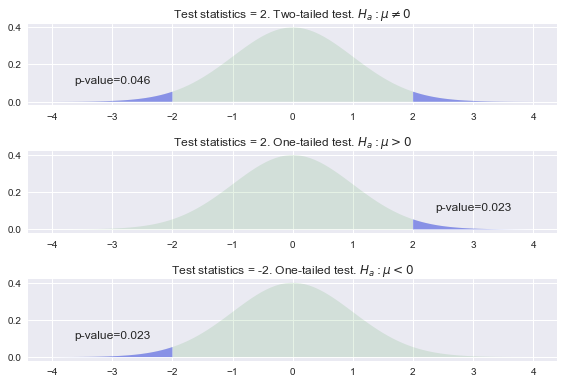

In [3]:
xx1 = np.linspace(-4, 4, 100)
xx2 = np.linspace(-4, -2, 100)
xx3 = np.linspace(2, 4, 100)

plt.subplot(3, 1, 1)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (2*sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. Two-tailed test. $H_a: \mu \neq 0$")

plt.subplot(3, 1, 2)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.text(3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = 2. One-tailed test. $H_a: \mu > 0$")

plt.subplot(3, 1, 3)
plt.fill_between(xx1, sp.stats.norm.pdf(xx1), facecolor='green', alpha=0.1)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.text(-3, 0.1, "p-value=%5.3f" % (sp.stats.norm.cdf(-2)), horizontalalignment='center')
plt.title(r"Test statistics = -2. One-tailed test. $H_a: \mu < 0$")

plt.tight_layout()
plt.show()

## 유의 수준과 기각역

계산된 유의 확률 값에 대해 귀무 가설을 기각하는지 채택하는지를 결정할 수 있는 기준 값을 유의 수준(level of significance)

유의 수준은 1%, 5%, 10% 

유의 수준에 대해 계산된 검정 통계량을 기각역(critical value)

기각역 값을 알고 있다면 유의 확률을 유의 수준과 비교하는 것이 아니라 검정 통계량을 직접 기각역과 비교하여 기각/채택 여부를 판단 할 수 있음

